In [11]:
# Pandas y otros
import pandas as pd
import numpy as np

In [12]:
# Mathplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)

<Axes: >

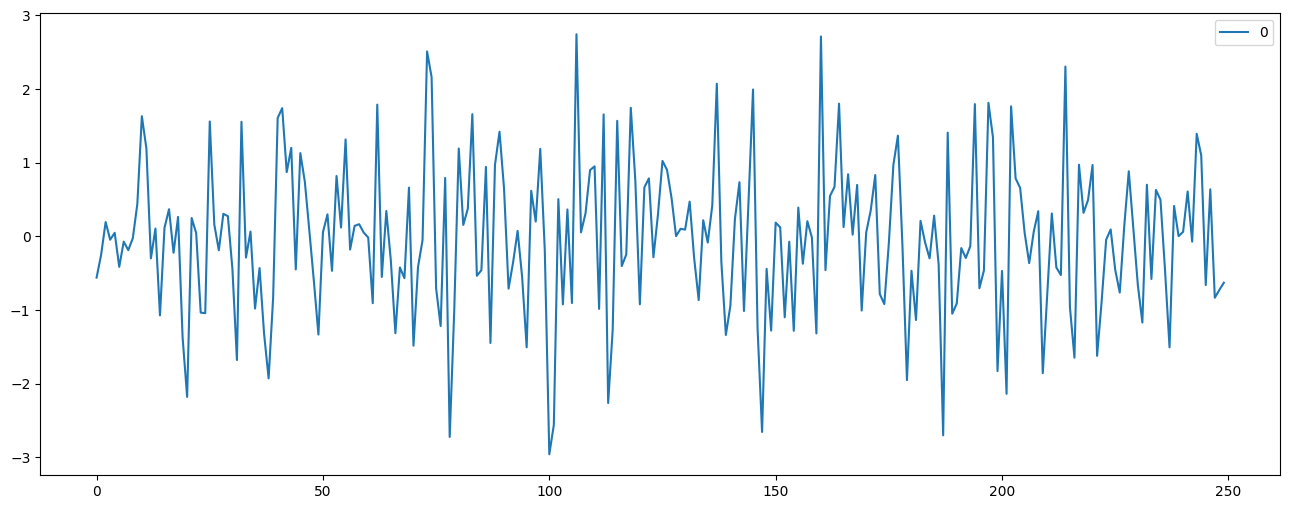

In [13]:
data = pd.DataFrame(np.random.randn(250))
data.plot()

array([[<Axes: title={'center': '0'}>]], dtype=object)

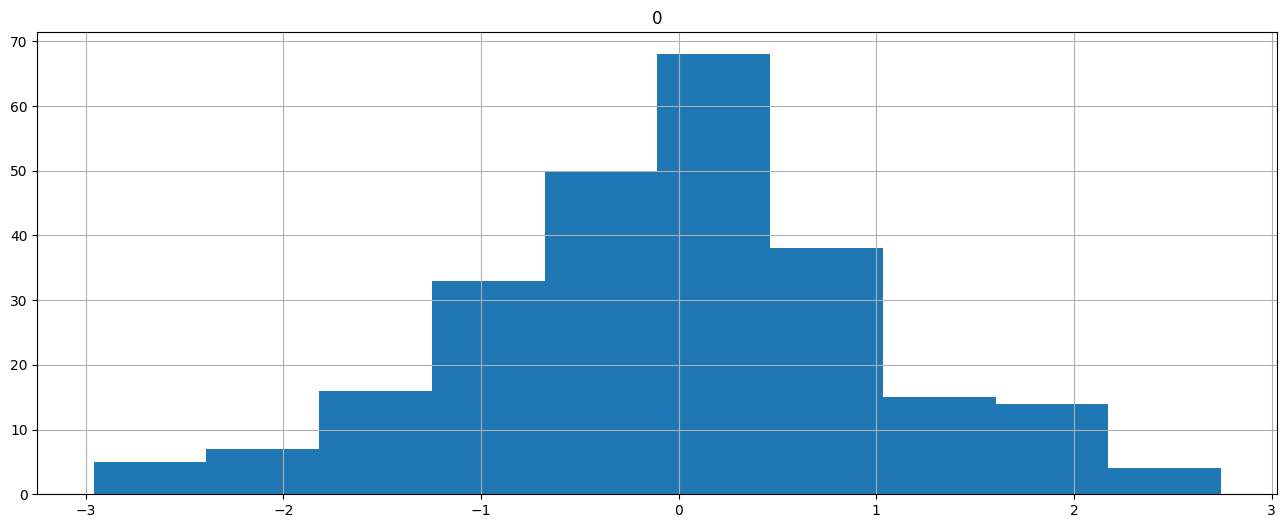

In [14]:
data.hist()

In [15]:
data.std()

0    1.023875
dtype: float64

<Axes: >

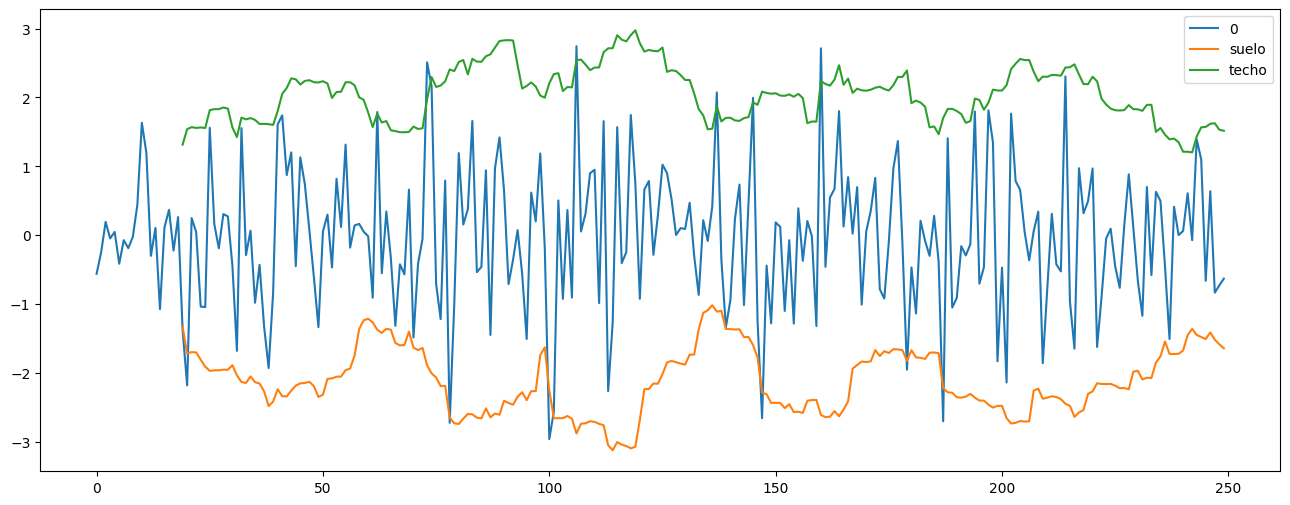

In [16]:
wind = 20
sigma = 2

data["suelo"] = data[0].rolling(window=wind)\
    .mean() - (sigma * data[0].rolling(window=wind).std())
data["techo"] = data[0].rolling(window=wind)\
    .mean() + (sigma * data[0].rolling(window=wind).std())
data.plot()

In [17]:
data["anom"] = data.apply(
    lambda row: row[0] if (row[0]<=row["suelo"] or row[0]>=row["techo"]) else 0, axis=1)

<Axes: >

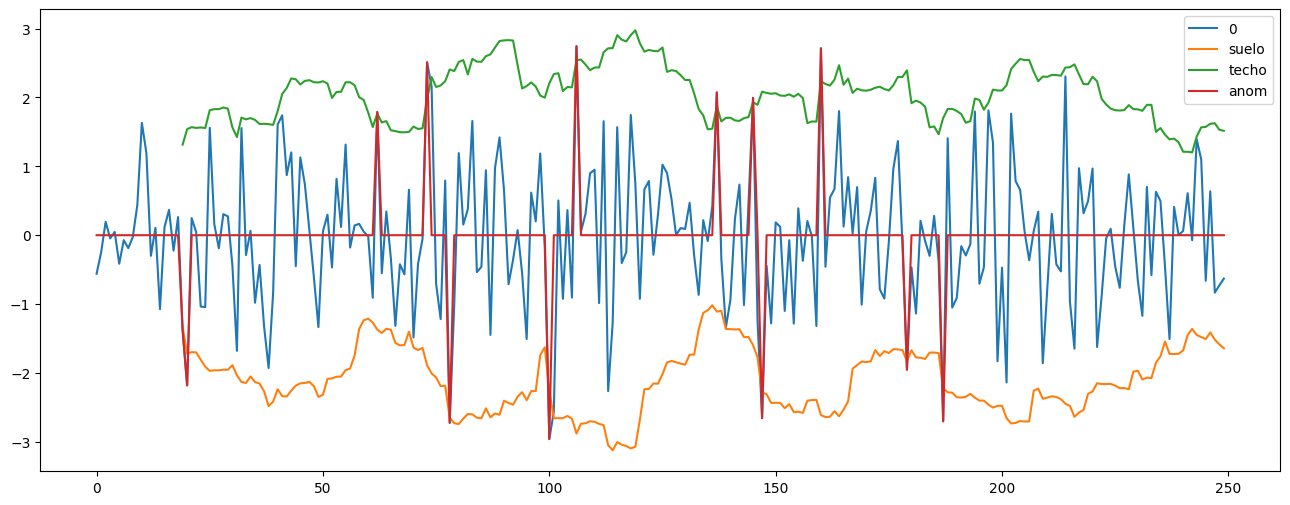

In [18]:
data.plot()

----
----

# Probando con datos reales

In [19]:
#data = pd.read_csv("Heart.csv", index_col=0 )
data = pd.read_csv("Heart - copia.csv", index_col=0 )
data.head()

##data.info()

,MaxHR
1,
2,150
3,108
4,129
5,187
6,172


<Axes: xlabel='1'>

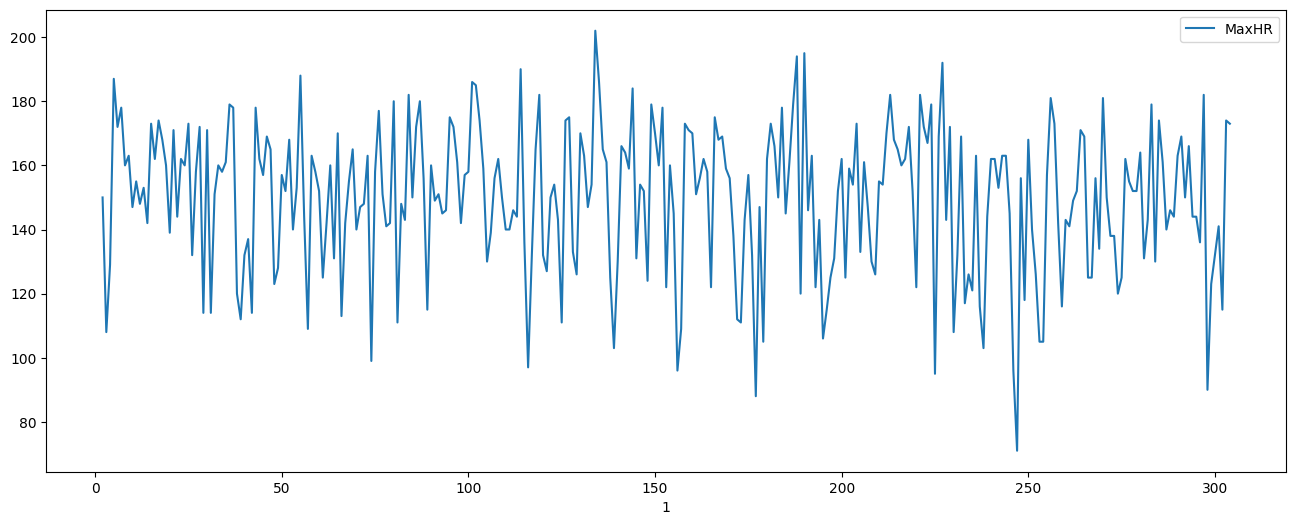

In [20]:
data.plot()

<Axes: xlabel='1'>

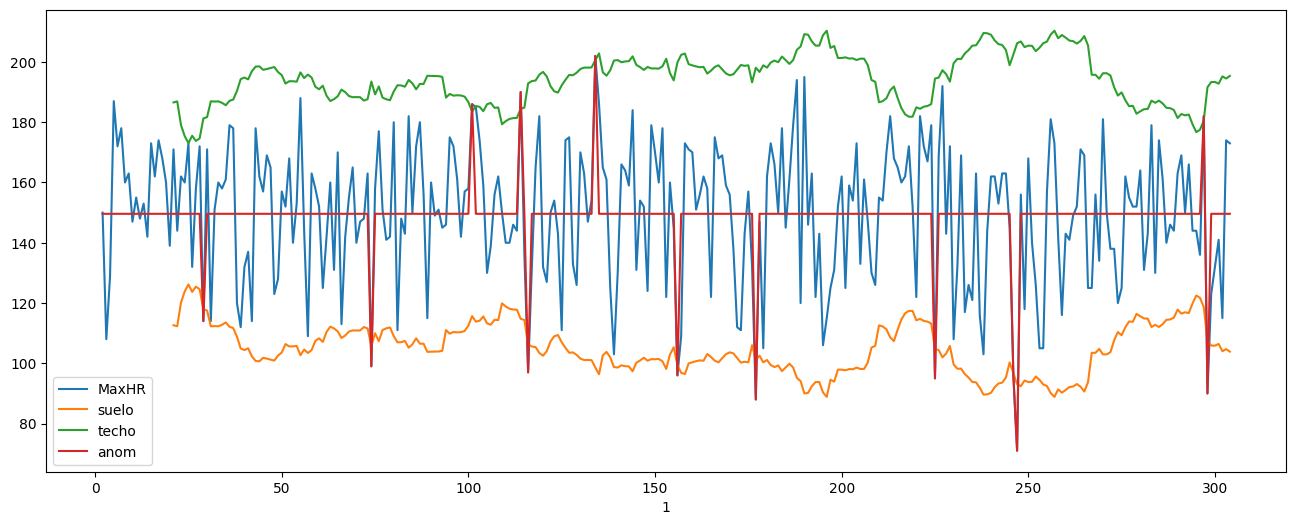

In [49]:
mean_hr = data["MaxHR"].mean()
wind = 20
sigma = 2

# Calcular las bandas usando el promedio como centro
data["suelo"] = mean_hr - (sigma * data["MaxHR"].rolling(window=wind).std())
data["techo"] = mean_hr + (sigma * data["MaxHR"].rolling(window=wind).std())

# Detectar anomalías
data["anom"] = data.apply(
    lambda row: row["MaxHR"] if (row["MaxHR"]<=row["suelo"] or row["MaxHR"]>=row["techo"]) else mean_hr, axis=1)

# Plotear
data.plot()